<a href="https://colab.research.google.com/github/MoonlightO2/Labour-Market-Research/blob/main/Labour_Market_Trends_and_Skill_Shortages_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Labour Market Trends and Skill Shortages Analysis**
***Objective***: To analyze the labour market trends based on historical job posting data, skill requirements, and geographical trends. The analysis will help identify the most in-demand skills and highlight any gaps in the workforce.

**Steps**:
Import Required Libraries: We'll use libraries like pandas, numpy, matplotlib, and seaborn for data manipulation and visualization.

**Data Preprocessing**:
Clean the dataset.
Handle missing or inconsistent values.
Convert relevant columns to the correct data types.

**Exploratory Data Analysis (EDA)**:
Visualize trends over time, such as job posting frequency and salary ranges.
Analyze the geographical distribution of job postings.

**Salary Analysis**:
Analyze salary ranges based on job titles, location, and work schedule.

**Skill Shortage Analysis**:
Analyze job descriptions and search terms to identify common skill gaps.

**Report Generation**:
Generate a report with insights and visualizations.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

path1 = "/content/drive/MyDrive/Projects/Data Visualisation/Jobs2.csv"
path2 = "/content/drive/MyDrive/Projects/Data Visualisation/Research Report.csv"

# Load dataset
df = pd.read_csv(path1)

print(df.shape)
print(df.columns.tolist(), '\n\n')
df.head()

In [ ]:
# Clean data (handling missing values, duplicates, etc.)
df.dropna(subset=['Title', 'Salary Range'], inplace=True)

# Remove special characters like '$' from the 'Title' and 'Description' columns
df['Title'] = df['Title'].replace({r'\$': ''}, regex=True)
df['Description'] = df['Description'].replace({r'\$': ''}, regex=True)

# Convert salary columns to numeric, handling errors
df['Salary Min'] = pd.to_numeric(df['Salary Min'], errors='coerce')
df['Salary Max'] = pd.to_numeric(df['Salary Max'], errors='coerce')
df['Salary Avg'] = df[['Salary Min', 'Salary Max']].mean(axis=1)

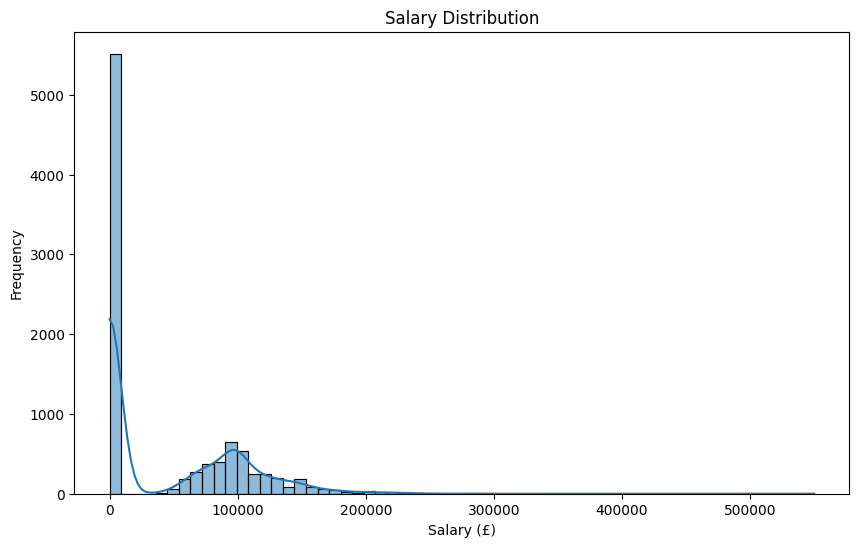

In [ ]:
# Market trends by salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary Avg'], kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary (£)")
plt.ylabel("Frequency")
plt.show()

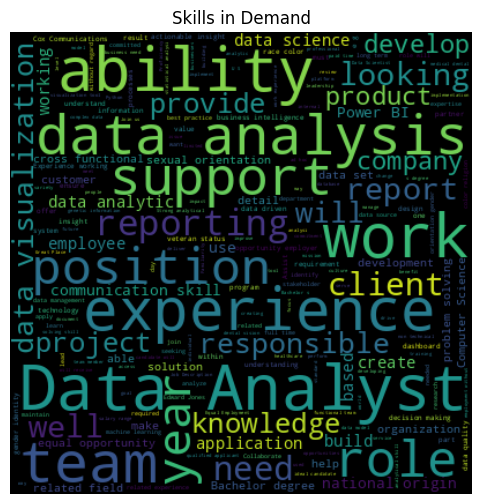

In [ ]:
# Extracting job titles and skills
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Description'])
terms = vectorizer.get_feature_names_out()

# Word cloud for skills in demand
wordcloud = WordCloud(width=400, height=400).generate(' '.join(df['Description']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Skills in Demand")
plt.show()

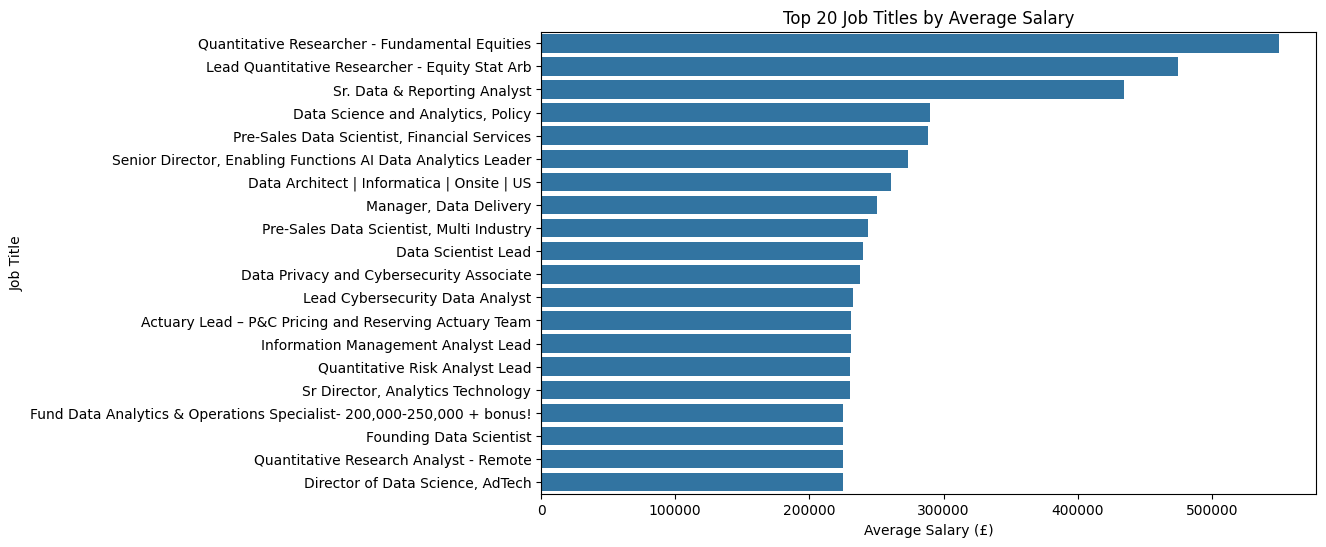

In [ ]:
# Correlation between salary and job titles
salary_job_titles = df.groupby('Title')['Salary Avg'].mean().reset_index()

# Sort by average salary in descending order and select top 20
salary_job_titles = salary_job_titles.sort_values(by='Salary Avg', ascending=False).head(20)

# Visualizing the top 20 job titles by average salary
plt.figure(figsize=(10, 6))
sns.barplot(x='Salary Avg', y='Title', data=salary_job_titles)
plt.title("Top 20 Job Titles by Average Salary")
plt.xlabel("Average Salary (£)")
plt.ylabel("Job Title")
plt.show()

In [ ]:
# Save the final report (summary of findings)
df_report = df[['Title', 'Salary Avg', 'Description']]
df_report.to_csv(path2, index=False)

# Optionally, print a summary of the findings
print("Research Summary:")
print("Average Salary by Job Title:")
print(salary_job_titles.head())

Research Summary:
Average Salary by Job Title:
                                               Title  Salary Avg
3911  Quantitative Researcher - Fundamental Equities    550000.0
3236  Lead Quantitative Researcher - Equity Stat Arb    475000.0
4686                    Sr. Data & Reporting Analyst    434500.0
1844              Data Science and Analytics, Policy    290000.0
3734    Pre-Sales Data Scientist, Financial Services    288000.0
